In [10]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.utils import to_categorical

In [3]:
from google.colab import files

# Upload kaggle.json file
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d arpitjain007/dog-vs-cat-fastai

 99% 1.58G/1.60G [00:08<00:00, 199MB/s]
100% 1.60G/1.60G [00:08<00:00, 193MB/s]


In [6]:
!unzip dog-vs-cat-fastai.zip


Streaming output truncated to the last 5000 lines.
  inflating: dogscats/train/dogs/dog.7066.jpg  
  inflating: dogscats/train/dogs/dog.7067.jpg  
  inflating: dogscats/train/dogs/dog.7068.jpg  
  inflating: dogscats/train/dogs/dog.7069.jpg  
  inflating: dogscats/train/dogs/dog.707.jpg  
  inflating: dogscats/train/dogs/dog.7070.jpg  
  inflating: dogscats/train/dogs/dog.7071.jpg  
  inflating: dogscats/train/dogs/dog.7072.jpg  
  inflating: dogscats/train/dogs/dog.7073.jpg  
  inflating: dogscats/train/dogs/dog.7074.jpg  
  inflating: dogscats/train/dogs/dog.7075.jpg  
  inflating: dogscats/train/dogs/dog.7076.jpg  
  inflating: dogscats/train/dogs/dog.7077.jpg  
  inflating: dogscats/train/dogs/dog.7078.jpg  
  inflating: dogscats/train/dogs/dog.7079.jpg  
  inflating: dogscats/train/dogs/dog.708.jpg  
  inflating: dogscats/train/dogs/dog.7080.jpg  
  inflating: dogscats/train/dogs/dog.7081.jpg  
  inflating: dogscats/train/dogs/dog.7082.jpg  
  inflating: dogscats/train/dogs/dog.70

In [7]:
train_dir = "/content/dogscats/train"
valid_dir = "/content/dogscats/valid"

train_datagen = ImageDataGenerator(
    rotation_range = 20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator( preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [8]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Flatten()(base_model.output)
model = Dense(512, activation='relu')(model)
model = Dense(128, activation='relu')(model)
model = Dense(2, activation='softmax')(model)
vgg_model = Model(inputs=base_model.input, outputs=model)
vgg_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

history = vgg_model.fit_generator(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

58889256/58889256 [==============================] - 0s 0us/step


<ipython-input-8-05d91b475302>:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = vgg_model.fit_generator(


Epoch 1/5
719/719 [==============================] - ETA: 0s - loss: 0.4580 - accuracy: 0.9355
Epoch 1: val_loss improved from inf to 0.12114, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


719/719 [==============================] - 346s 464ms/step - loss: 0.4580 - accuracy: 0.9355 - val_loss: 0.1211 - val_accuracy: 0.9675
Epoch 2/5
719/719 [==============================] - ETA: 0s - loss: 0.1253 - accuracy: 0.9599
Epoch 2: val_loss did not improve from 0.12114
719/719 [==============================] - 334s 465ms/step - loss: 0.1253 - accuracy: 0.9599 - val_loss: 0.1237 - val_accuracy: 0.9700
Epoch 3/5
719/719 [==============================] - ETA: 0s - loss: 0.0874 - accuracy: 0.9686
Epoch 3: val_loss did not improve from 0.12114
719/719 [==============================] - 347s 482ms/step - loss: 0.0874 - accuracy: 0.9686 - val_loss: 0.1226 - val_accuracy: 0.9735
Epoch 4/5
719/719 [==============================] - ETA: 0s - loss: 0.0721 - accuracy: 0.9737
Epoch 4: val_loss improved from 0.12114 to 0.09500, saving model to best_model.h5
719/719 [==============================] - 326s 453ms/step - loss: 0.0721 - accuracy: 0.9737 - val_loss: 0.0950 - val_accuracy: 0.9750

Found 2000 images belonging to 2 classes.
63/63 [==============================] - 10s 155ms/step - loss: 0.1018 - accuracy: 0.9735
Test Loss: 0.10180466622114182, Test Accuracy: 0.9735000133514404
63/63 [==============================] - 9s 138ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1000
           1       0.96      0.99      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



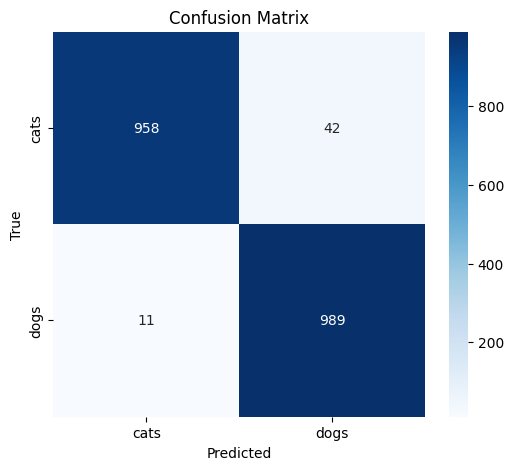

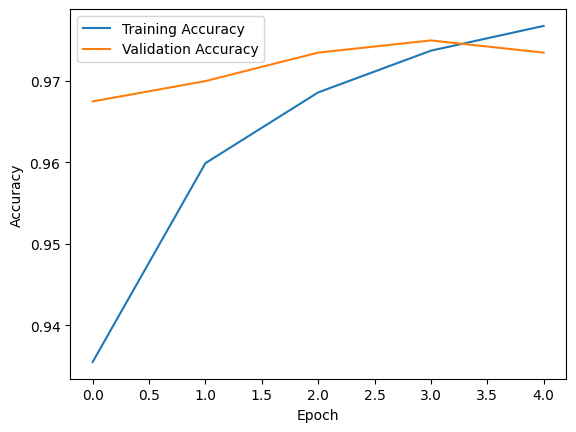

In [12]:
# Evaluate on test set
test_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to keep the order of predictions for evaluation
)

test_labels = test_generator.classes
test_labels_categorical = to_categorical(test_labels)

test_loss, test_accuracy = vgg_model.evaluate(test_generator, verbose=1)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Confusion Matrix
predictions = vgg_model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_labels)

# Print Classification Report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
model = Flatten()(base_model.output)
model = Dense(512, activation='relu')(model)

model = Dense(128, activation='relu')(model)
model = Dense(2, activation='softmax')(model)
ResNet_model = Model(inputs=base_model.input, outputs=model)
ResNet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint('best_model_resnet.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

history = ResNet_model.fit_generator(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

<ipython-input-14-7589abbd813a>:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = ResNet_model.fit_generator(


Epoch 1/5
719/719 [==============================] - ETA: 0s - loss: 0.1378 - accuracy: 0.9560
Epoch 1: val_loss improved from inf to 0.04367, saving model to best_model_resnet.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


719/719 [==============================] - 335s 461ms/step - loss: 0.1378 - accuracy: 0.9560 - val_loss: 0.0437 - val_accuracy: 0.9840
Epoch 2/5
719/719 [==============================] - ETA: 0s - loss: 0.0821 - accuracy: 0.9700
Epoch 2: val_loss did not improve from 0.04367
719/719 [==============================] - 322s 448ms/step - loss: 0.0821 - accuracy: 0.9700 - val_loss: 0.0486 - val_accuracy: 0.9820
Epoch 3/5
719/719 [==============================] - ETA: 0s - loss: 0.0657 - accuracy: 0.9756
Epoch 3: val_loss did not improve from 0.04367
719/719 [==============================] - 323s 449ms/step - loss: 0.0657 - accuracy: 0.9756 - val_loss: 0.0562 - val_accuracy: 0.9775
Epoch 4/5
719/719 [==============================] - ETA: 0s - loss: 0.0553 - accuracy: 0.9801
Epoch 4: val_loss did not improve from 0.04367
Restoring model weights from the end of the best epoch: 1.
719/719 [==============================] - 322s 447ms/step - loss: 0.0553 - accuracy: 0.9801 - val_loss: 0.051

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Found 2000 images belonging to 2 classes.
63/63 [==============================] - 8s 120ms/step - loss: 0.0437 - accuracy: 0.9840
Test Loss: 0.04366639629006386, Test Accuracy: 0.984000027179718
63/63 [==============================] - 8s 114ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1000
           1       0.98      0.98      0.98      1000

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



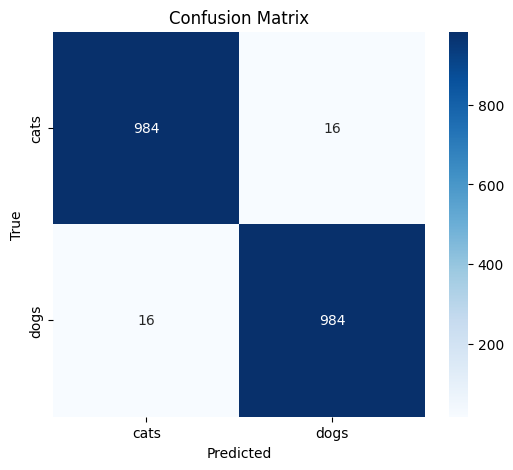

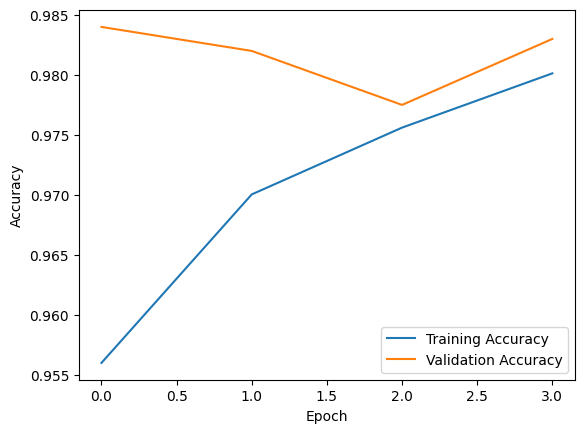

In [15]:
# Evaluate on test set
test_generator_resnet = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to keep the order of predictions for evaluation
)

test_labels_resnet = test_generator_resnet.classes
test_labels_categorical_resnet = to_categorical(test_labels_resnet)

test_loss_resnet, test_accuracy_resnet = ResNet_model.evaluate(test_generator_resnet, verbose=1)
print(f'Test Loss: {test_loss_resnet}, Test Accuracy: {test_accuracy_resnet}')

# Confusion Matrix
predictions_resnet = ResNet_model.predict(test_generator_resnet)
predicted_labels_resnet = np.argmax(predictions_resnet, axis=1)

cm_resnet = confusion_matrix(test_labels_resnet, predicted_labels_resnet)

# Print Classification Report
print("Classification Report:")
print(classification_report(test_labels_resnet, predicted_labels_resnet))

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 [==============================] - 0s 56ms/step


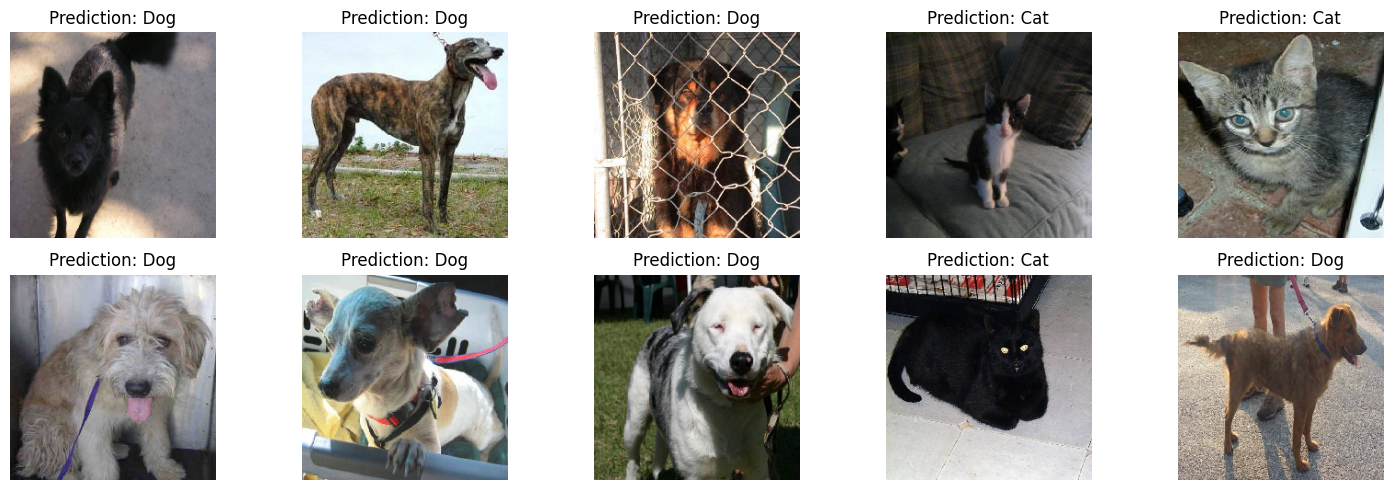

In [16]:
#predicting on unseen Dataset
import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt


# Directory containing test images
test_dir = "/content/dogscats/test1"

# Initialize the subplot
plt.figure(figsize=(15, 5))

# Iterate through the images in the directory
for i, filename in enumerate(os.listdir(test_dir)[90:100]):  # Change the number to the desired limit (e.g., 10)
    img_path = os.path.join(test_dir, filename)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)

    # Make a prediction
    output = vgg_model.predict(img)

    # Create a subplot for each image
    plt.subplot(2, 5, i + 1)
    plt.imshow(img[0])
    if output[0][0] > output[0][1]:
        plt.title(f"Prediction: Cat")
    else:
        plt.title(f"Prediction: Dog")
    plt.axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 134ms/step


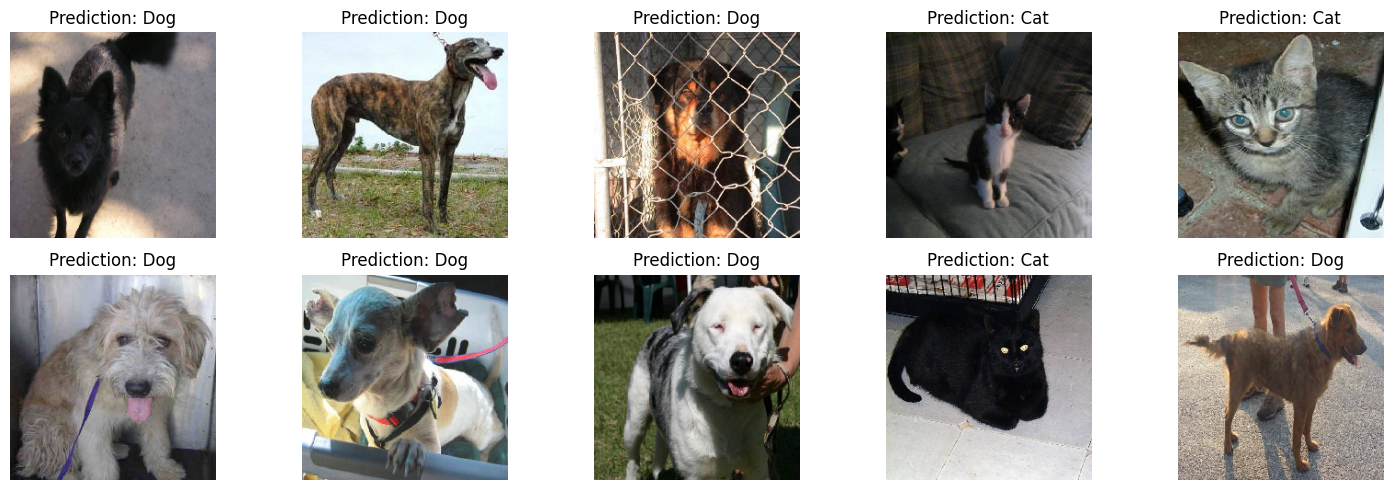

In [17]:
#predicting on unseen Dataset
import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt


# Directory containing test images
test_dir = "/content/dogscats/test1"

# Initialize the subplot
plt.figure(figsize=(15, 5))

# Iterate through the images in the directory
for i, filename in enumerate(os.listdir(test_dir)[90:100]):  # Change the number to the desired limit (e.g., 10)
    img_path = os.path.join(test_dir, filename)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)

    # Make a prediction
    output = ResNet_model.predict(img)

    # Create a subplot for each image
    plt.subplot(2, 5, i + 1)
    plt.imshow(img[0])
    if output[0][0] > output[0][1]:
        plt.title(f"Prediction: Cat")
    else:
        plt.title(f"Prediction: Dog")
    plt.axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()